In [31]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt

In [32]:
df = read_csv(r"D:\usuarios\alvar\OneDrive\Escritorio\AAB\Practicas_AAB\P2\data2.csv", header=None)
VARS_IN = ["tamaño en pies cuadrados", "numero de habitaciones"]
VAR_OUT = "precio"
print(df)
data = df.to_numpy()
print(data.shape)

       0  1       2
0   2104  3  399900
1   1600  3  329900
2   2400  3  369000
3   1416  2  232000
4   3000  4  539900
5   1985  4  299900
6   1534  3  314900
7   1427  3  198999
8   1380  3  212000
9   1494  3  242500
10  1940  4  239999
11  2000  3  347000
12  1890  3  329999
13  4478  5  699900
14  1268  3  259900
15  2300  4  449900
16  1320  2  299900
17  1236  3  199900
18  2609  4  499998
19  3031  4  599000
20  1767  3  252900
21  1888  2  255000
22  1604  3  242900
23  1962  4  259900
24  3890  3  573900
25  1100  3  249900
26  1458  3  464500
27  2526  3  469000
28  2200  3  475000
29  2637  3  299900
30  1839  2  349900
31  1000  1  169900
32  2040  4  314900
33  3137  3  579900
34  1811  4  285900
35  1437  3  249900
36  1239  3  229900
37  2132  4  345000
38  4215  4  549000
39  2162  4  287000
40  1664  2  368500
41  2238  3  329900
42  2567  4  314000
43  1200  3  299000
44   852  2  179900
45  1852  4  299900
46  1203  3  239500
(47, 3)


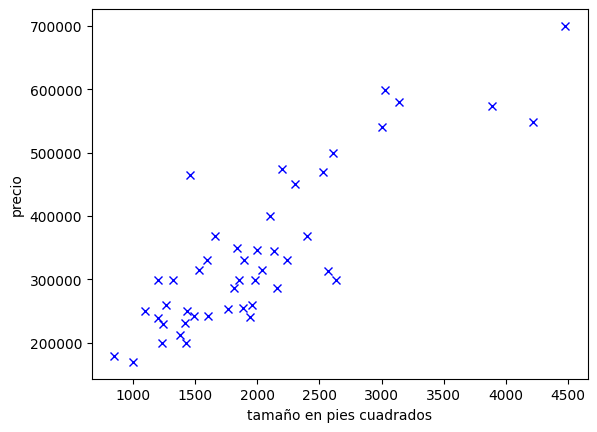

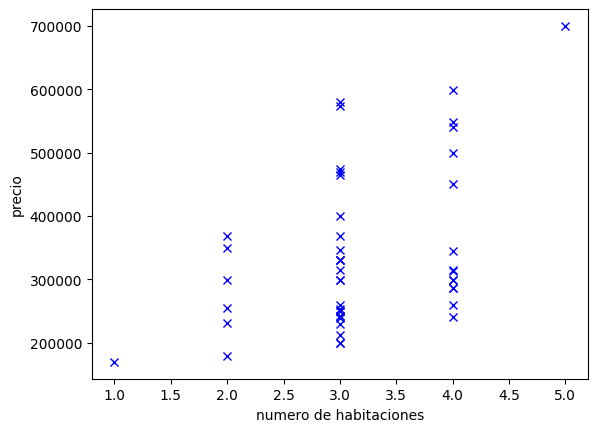

In [33]:
for i in range(len(VARS_IN)):
    plt.plot(data[:,i], data[:,-1], "x",color="blue")
    plt.xlabel(VARS_IN[i])
    plt.ylabel(VAR_OUT)
    plt.show()

In [34]:
def normalize(matrix):
    mu = np.mean(matrix, axis=0)
    sigma = np.std(matrix, axis=0)
    print(mu, sigma)
    
    matrix_normalize = np.zeros(matrix.shape)
    i = 0
    for med, dev in zip(mu, sigma):
        matrix_normalize[:,i] = (matrix[:,i] - med )/ dev
        i+=1

    return mu, sigma, matrix_normalize

In [35]:
mu, sigma, data_normalize = normalize(data)

[2.00068085e+03 3.17021277e+00 3.40412660e+05] [7.86202619e+02 7.52842809e-01 1.23702536e+05]


In [36]:
x = data_normalize[:,:-1] #variables de entrada
y = data_normalize[:,-1]
print(len(x), len(y))

47 47


In [37]:
w = np.zeros(x[0].shape)
b = 0
NUMBER_OF_ITS = 1000
ALFA = float(0.01)

In [38]:
def linear_regression(x_i, w, b):
    return np.dot(x_i,w) + b

In [39]:
print("Start: ")
print("w =",w, "b =", b)
#print("Coste =", cost_fun(x, y, w, b))

for i in range(NUMBER_OF_ITS):
    #print(w, b) 
    res_1 = 0
    res_2 = 0 
    for i, x_i in enumerate(x):
        y_pred = linear_regression(x_i, w, b)
        dis =  y_pred - y[i]
        res_1 += dis * x_i
        res_2 += dis

    v_w = ALFA * (res_1 / len(x))
    v_b = ALFA * (res_2 / len(x))
    w -= v_w
    b -= v_b

    # Añada etiquetas a los ejes

print("\nFinal : ")
print("w =",w, "b =", b)
#print("Coste =", cost_fun(x, y, w, b))

Start: 
w = [0. 0.] b = 0

Final : 
w = [ 0.8790657  -0.04747865] b = -7.856599531709097e-17


In [40]:
print(mu, sigma)

[2.00068085e+03 3.17021277e+00 3.40412660e+05] [7.86202619e+02 7.52842809e-01 1.23702536e+05]


In [41]:
def calculate(mu, sigma, x):
    norm_x_in = (x_in - mu[:-1])/ sigma[:-1] # Normalizar

    norm_out = linear_regression(norm_x_in, w, b)

    return norm_out * sigma[-1] + mu[-1] # Desnormalizar


In [42]:
x_in = np.array([1650, 3])

print(calculate(mu, sigma, x_in))


293236.56372275495
